# This is the final project of IBM courses.
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

This project aims to find out **what type of Collision type has the highest severity level in the past**, and **whether road condition and light condition have impacts on these accidents**.

Although there are plenty of charecteristics that might affect car accidents, this project will only focus on road condition and light condition and try to figure out how these attributes affect severity level.

We will use data science power to generate promissing results and help stakeholders reduce accidents and optimize cars or roads condition.

## Data <a name="data"></a>

We will use **Data-Collision dataset**, including Severitycode, Collissiontype, Roadcond and Lightcond columns, to analyse the relationship between these attributes and give a conclusion in the end of this project.

These data will be mainly used in this project:
* Severitycode
* Collisiontype
* Roadcond
* Lightcond

Let's take a look of our data first:

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_all = pd.read_csv('/Users/grace/Downloads/Data-Collisions.csv')
df_all.head()

/Users/grace/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [29]:
df = df_all[['SEVERITYCODE', 'COLLISIONTYPE', 'ROADCOND', 'LIGHTCOND']]
df = df.dropna()
df.head()

,SEVERITYCODE,COLLISIONTYPE,ROADCOND,LIGHTCOND
0,2,Angles,Wet,Daylight
1,1,Sideswipe,Wet,Dark - Street Lights On
2,1,Parked Car,Dry,Daylight
3,1,Other,Dry,Daylight
4,2,Angles,Wet,Daylight


Looking good. So now we have all the data we need to conduct our project.

This concludes the data gathering phase - we're now ready to use this data for analysis to produce the report!

## Methodology <a name="methodology"></a>

In this project, we will use **bar chart** to find out which collisiontype has the highest severitycode. Then we will use **decision tree** to predict which situation (road condition and light condition) would lead to higher severity level.

## Analysis <a name="analysis"></a>

First, let's take a look of **which collision type has the highest severity code**.

<IPython.core.display.Javascript object>


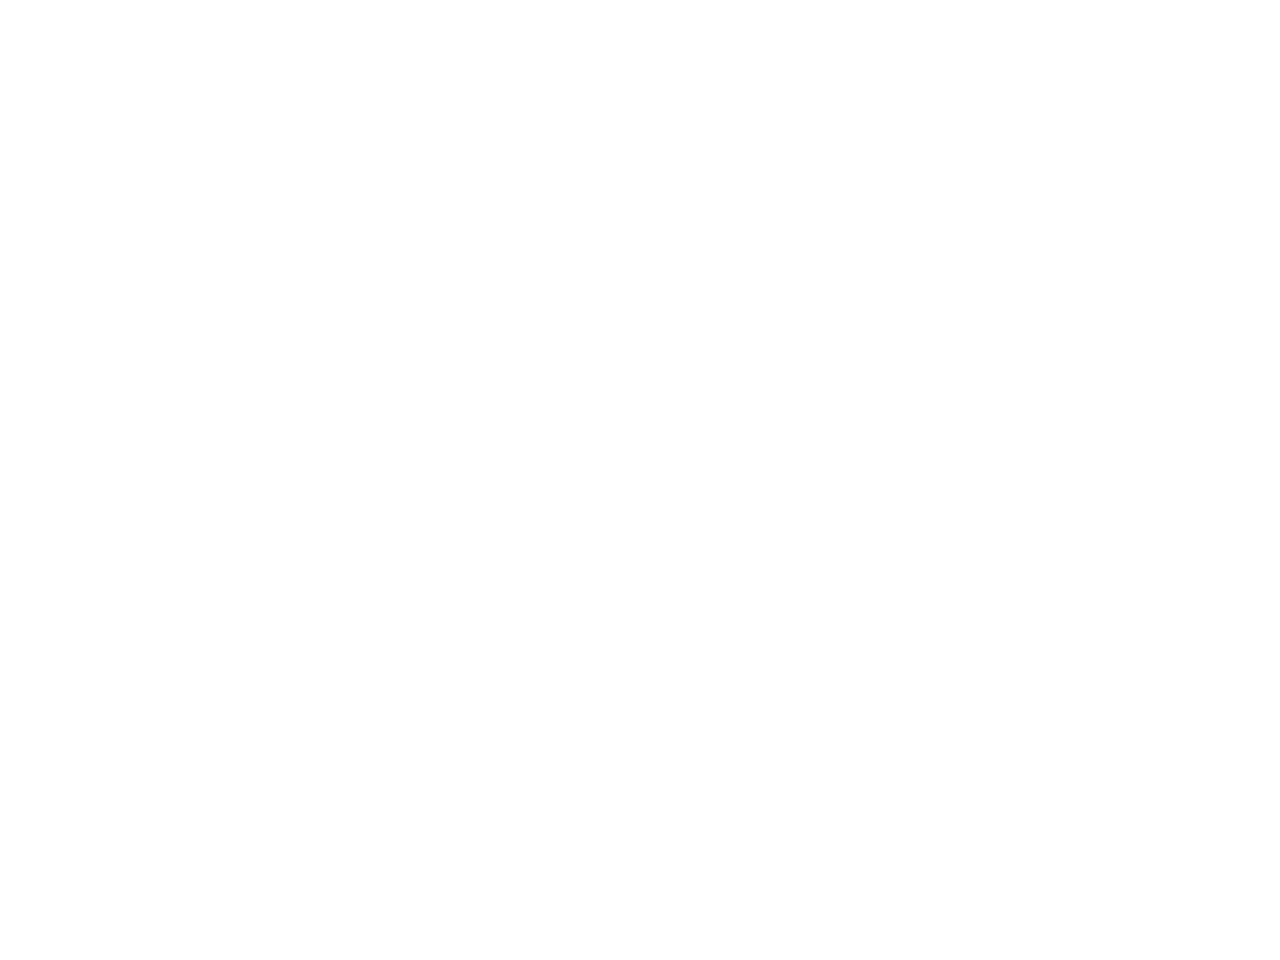

KeyboardInterrupt: 

In [39]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1)
df_bar = pd.Series(df['SEVERITYCODE'], index=df['COLLISIONTYPE']) 
df_bar.plot.bar(color='k', alpha=0.7)

As we can see in this plot, Parked Car has the highest severity level which means parked cars are the most normal car accident.

Next, let's find out which situation (road condition and light condition) would lead to higher severity level.

But before we train and test our model, we need to **transform our catagorical data to numerical data**.

In [30]:
X = df[['SEVERITYCODE', 'COLLISIONTYPE', 'ROADCOND', 'LIGHTCOND']].values
X[0:5]

array([[2, 'Angles', 'Wet', 'Daylight'],
       [1, 'Sideswipe', 'Wet', 'Dark - Street Lights On'],
       [1, 'Parked Car', 'Dry', 'Daylight'],
       [1, 'Other', 'Dry', 'Daylight'],
       [2, 'Angles', 'Wet', 'Daylight']], dtype=object)

In [31]:
from sklearn import preprocessing

le_type = preprocessing.LabelEncoder()
le_type.fit(['Null','Angles','Cycles','Head On','Left Turn','Other','Parked Car','Pedestrian','Rear Ended','Right Turn','Sideswipe'])
X[:,1] = le_type.transform(X[:,1]) 

le_road = preprocessing.LabelEncoder()
le_road.fit(['Null','Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Wet'])
X[:,2] = le_road.transform(X[:,2])

le_light = preprocessing.LabelEncoder()
le_light.fit(['Null','Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk','Other','Unknown'])
X[:,3] = le_light.transform(X[:,3])

X[0:5]

array([[2, 0, 9, 5],
       [1, 10, 9, 2],
       [1, 6, 0, 5],
       [1, 5, 0, 5],
       [2, 0, 9, 5]], dtype=object)

In [32]:
y = df['SEVERITYCODE']
y[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

Our data is ready now. Let's **set up our decision tree**.

In [42]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

print(X_trainset.shape, X_testset.shape, y_trainset.shape, y_testset.shape)

(132595, 4) (56827, 4) (132595,) (56827,)


Done. Now let's **model and predict severity level** using decision tree.

In [43]:
SeverityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
SeverityTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
SeverityTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
predTree = SeverityTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

[1 1 1 1 1]
54844     1
96465     1
62892     1
102837    1
80899     1
Name: SEVERITYCODE, dtype: int64


The final step is to **evaluate our decision tree**.

In [47]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


## Results and Discussion <a name="results"></a>

Results show that parked car is the most common type of car accidents and we can use decision tree to predict severity level based on light condition and road condition.

This could give car companies and insurance companies some ideas to prevent car accidents. For example, car companies should pay more attention on car parking and insurance companies should take road and light conditions in consedaration when dealing with a car accident.

## Conclusion <a name="conclusion"></a>

Purpose of this project is to find out which car accidents types has the worst impact and what condition (road and light) could lead to higher severity level. This means to help stakeholders prevent car accidents in the future.

Final decision based on collision database and could be useful for other stakeholders.